In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

In [2]:
data = pd.read_csv('../data/raw/ml-100k/u.data', sep = '\t', header = None)
data.columns = ['user_id', 'item_id', 'rating', 'timestamp']

info = pd.read_csv('../data/raw/ml-100k/u.info', header = None)
item = pd.read_csv('../data/raw/ml-100k/u.item', sep = '|', header = None, encoding='latin-1')
genres = pd.read_csv('../data/raw/ml-100k/u.genre', sep = '|', header = None)

user = pd.read_csv('../data/raw/ml-100k/u.user', sep = '|', header = None)
user.columns = ['user_id', 'age', 'gender', 'occupation', 'zip code']

occupations = pd.read_csv('../data/raw/ml-100k/u.occupation', sep = '|', header = None)


In [3]:
#print(data.head())
#print(info)
#print(item.head())
#print(genres.head())
#print(user.head())
#print(occupations.head())

# ***Heads***

In [4]:
data.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:
info = {
    'users': info[0][0].split()[0],
    'items': info[0][1].split()[0],
    'ratings': info[0][2].split()[0]
}
print(info)

{'users': '943', 'items': '1682', 'ratings': '100000'}


In [6]:
genre_columns = []
for genre in genres[0]:
    genre_columns.append(genre)
print(genre_columns)

['unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']


In [7]:
item.columns = ['item_id', 'movie title', 'release date', 'video release date',
              'IMDb URL'] + genre_columns
item.head()

,item_id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [8]:
user.head()

,user_id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [9]:
occupation_columns = []
for occupation in occupations[0]:
    occupation_columns.append(occupation)
print(occupation_columns)

['administrator', 'artist', 'doctor', 'educator', 'engineer', 'entertainment', 'executive', 'healthcare', 'homemaker', 'lawyer', 'librarian', 'marketing', 'none', 'other', 'programmer', 'retired', 'salesman', 'scientist', 'student', 'technician', 'writer']


# ***Plots***

In [10]:
colors = [(1, 1, 0), (1, 0.1, 1)] 

cm = LinearSegmentedColormap.from_list("Custom", colors, N=21)

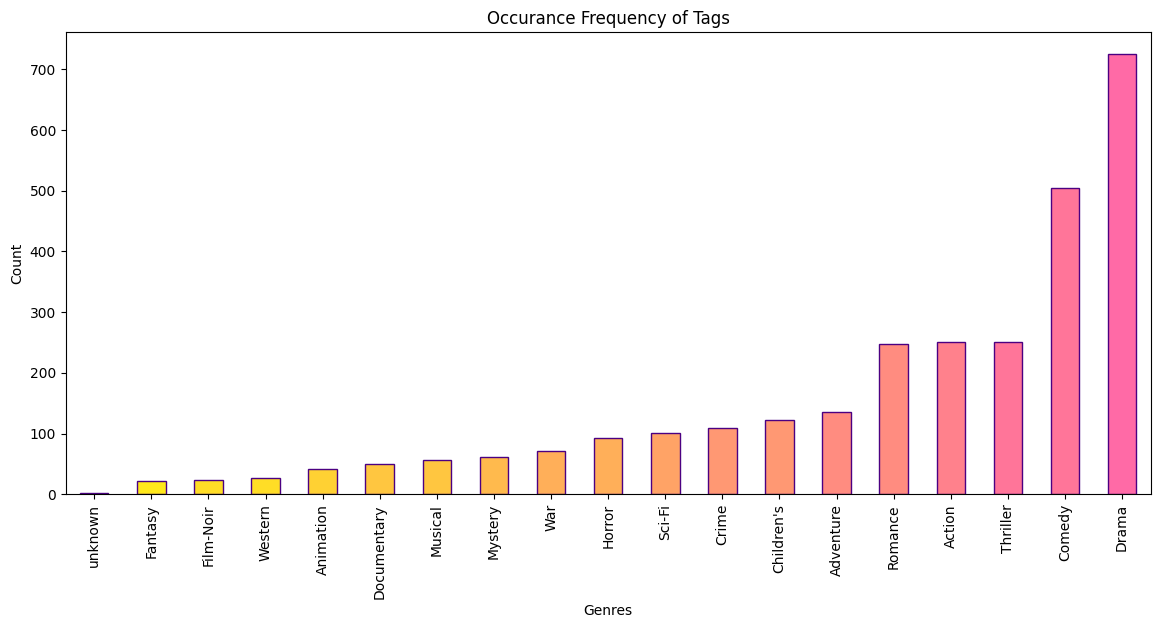

In [11]:
res = item.copy()
res.drop(['item_id', 'movie title', 'release date', 'video release date', 
                          'IMDb URL'], axis=1, inplace=True)

result = np.sum(res, axis=0)
fig = plt.figure(1, figsize=(14,6))
result.sort_values().plot(kind = 'bar', title = 'Occurance Frequency of Tags', color = [cm(x) for x in np.linspace(0.1, 0.7, 21)], edgecolor = "indigo")
plt.xlabel('Genres')
plt.ylabel('Count')
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)
plt.rc('axes', labelsize=20)
plt.show()

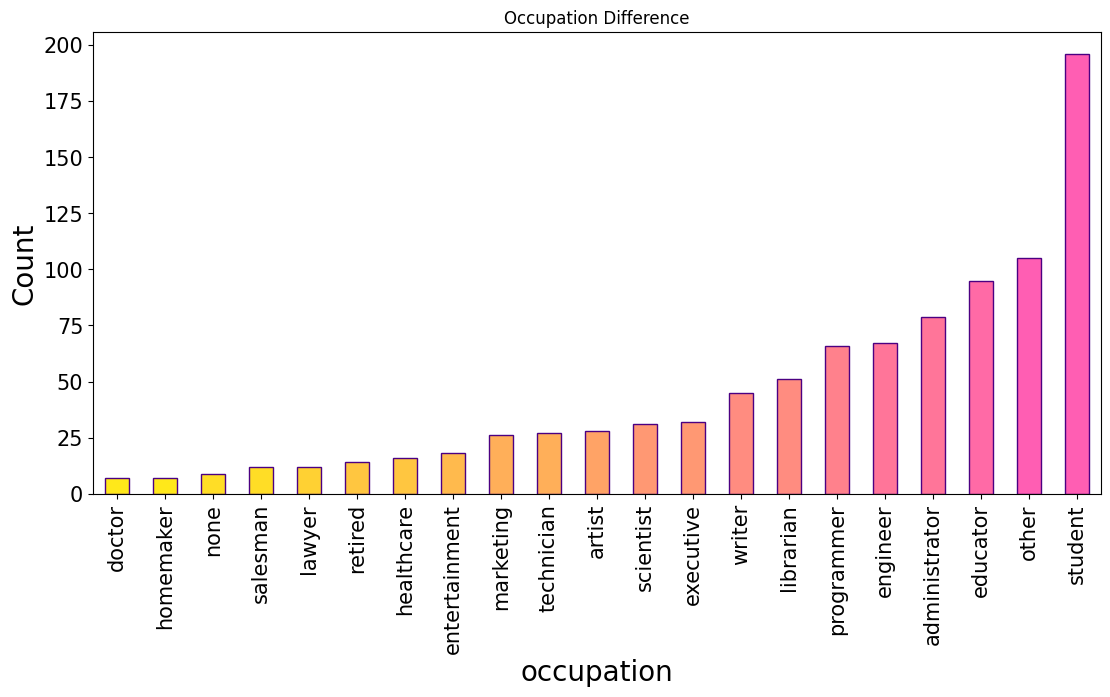

In [12]:
result = user.copy()
result.drop(['age', 'gender', 'zip code'], axis=1, inplace=True)
result = result.groupby('occupation').size()

fig1 = plt.figure(figsize=(13,6))
result.sort_values().plot(kind = 'bar', title = 'Occupation Difference', 
                          color = [cm(x) for x in np.linspace(0.1, 0.7, 21)], edgecolor = "indigo")
plt.ylabel('Count')
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)
plt.rc('axes', labelsize=20)
plt.show()

In [13]:
fig2 = plt.figure()
new_data = (data).merge(item)
top_10 = new_data.groupby('movie title').size().sort_values(ascending = False).head(10)
display(top_10)
rating = new_data.groupby('movie title').agg({'rating': [np.size, np.mean]})
top_20_rating = rating.sort_values([('rating', 'mean')],ascending = False).head(20)
display(top_20_rating)

movie title
Star Wars (1977)                 583
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
dtype: int64

rating          
                                                     size      mean
movie title                                                        
They Made Me a Criminal (1939)                          1  5.000000
Marlene Dietrich: Shadow and Light (1996)               1  5.000000
Saint of Fort Washington, The (1993)                    2  5.000000
Someone Else's America (1995)                           1  5.000000
Star Kid (1997)                                         3  5.000000
Great Day in Harlem, A (1994)                           1  5.000000
Aiqing wansui (1994)                                    1  5.000000
Santa with Muscles (1996)                               2  5.000000
Prefontaine (1997)                                      3  5.000000
Entertaining Angels: The Dorothy Day Story (1996)       1  5.000000
Pather Panchali (1955)                                  8  4.625000
Some Mother's Son (1996)                                2  4.500000
Maya Lin: A Strong Clear Vision (1994)                  4  4.500000
Anna (1996)                                             2  4.500000
Everest (1998)                                          2  4.500000
Close Shave, A (1995)                                 112  4.491071
Schindler's List (1993)                               298  4.466443
Wrong Trousers, The (1993)                            118  4.466102
Casablanca (1942)                                     243  4.456790
Wallace & Gromit: The Best of Aardman Animation...     67  4.447761

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'Age Distribution')

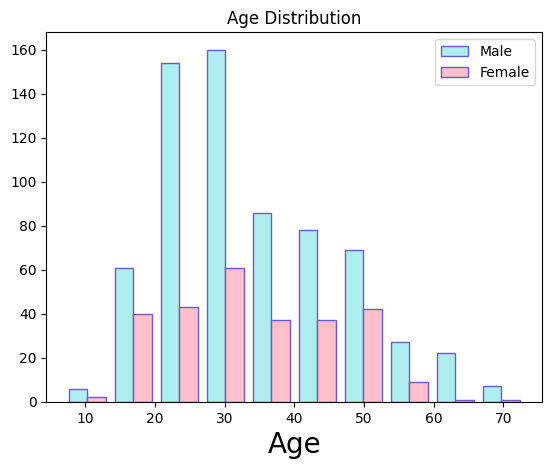

In [14]:
fig3, ax = plt.subplots()

plt.hist([user[user['gender'] == "M"]['age'], user[user['gender'] == "F"]['age']], 
         color = ['paleturquoise', 'pink'], label = ['Male', 'Female'], edgecolor = "slateblue")
plt.legend()
plt.xlabel('Age')
plt.title('Age Distribution')

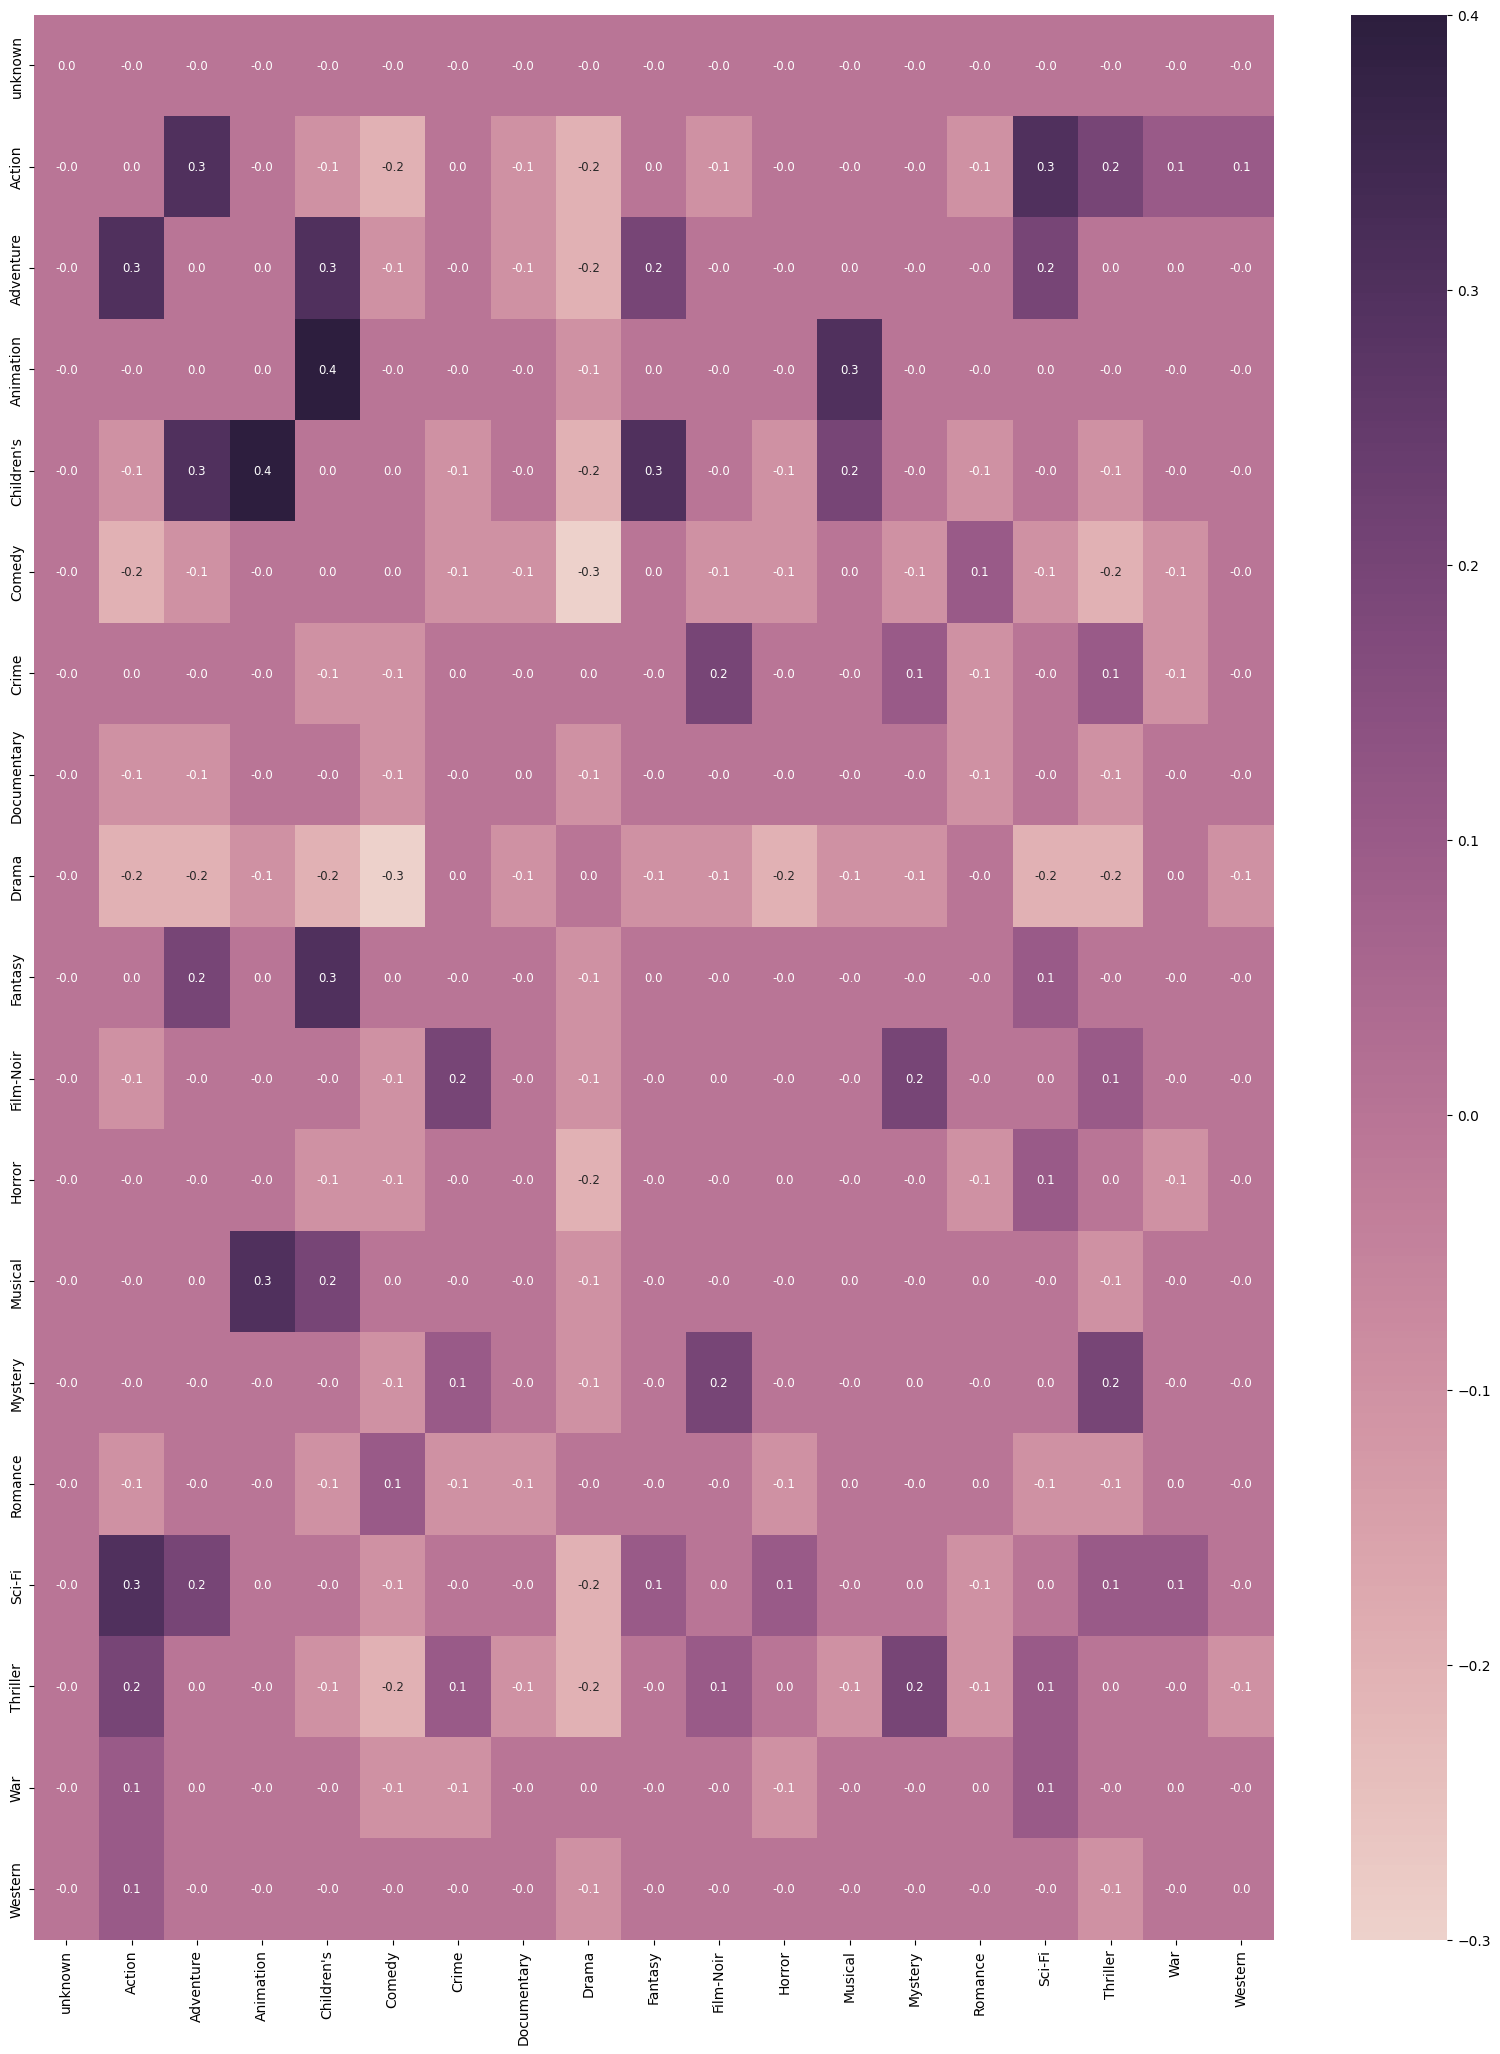

In [15]:
g = item.copy()
g.drop(['item_id', 'movie title', 'release date', 'video release date',
              'IMDb URL'], axis=1, inplace=True)
g.index = item['item_id']

g = g.corr()
np.fill_diagonal(g.values, 0)
frac = np.round(g, 1)

fig4 = plt.figure(figsize = (20, 25))
sns.heatmap(frac, annot=True, fmt=".1f", annot_kws={"fontsize":"small"},
            cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()